# ✅ 1. Entrenamiento del modelo

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar el dataset
digits = load_digits()

# Separar en características (X) y etiquetas (y)
X = digits.data  # imágenes aplanadas (64 características por imagen)
y = digits.target  # etiquetas (números del 0 al 9)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador (puede ser cambiado por otros modelos)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9722222222222222

Matriz de confusión:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95       

# 📷 2. Subir una imagen manuscrita, procesarla y predecir

Subí una imagen manuscrita del 0 al 9...


Saving numero 5.0.jpg to numero 5.0.jpg


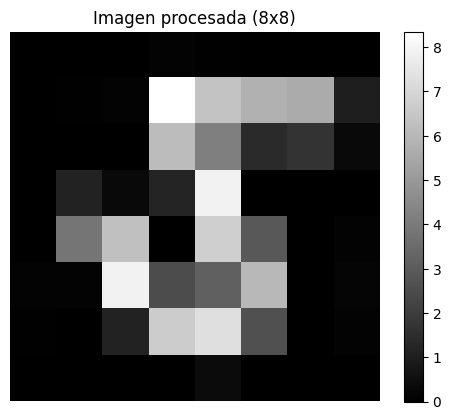

🔍 El modelo predice que el número es: 7


In [4]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Subir una imagen manuscrita
print("Subí una imagen manuscrita del 0 al 9...")
uploaded = files.upload()

for fn in uploaded.keys():
    # Paso 1: Abrir y convertir a escala de grises
    img = Image.open(fn).convert('L')

    # Paso 2: Invertir colores para fondo negro y número blanco
    img = ImageOps.invert(img)

    # Paso 3: Recortar y ajustar contraste
    img = ImageOps.autocontrast(img)

    # Paso 4: Redimensionar a 8x8
    img_resized = img.resize((8, 8), Image.LANCZOS)

    # Paso 5: Convertir a arreglo numpy y escalar al rango 0–16
    img_array = np.array(img_resized)
    img_scaled = (img_array / 255.0) * 16
    img_scaled = img_scaled.astype(np.float64)

    # Mostrar imagen procesada
    plt.imshow(img_scaled, cmap='gray')
    plt.title('Imagen procesada (8x8)')
    plt.colorbar()
    plt.axis('off')
    plt.show()

    # Paso 6: Aplanar la imagen (1D de 64 elementos)
    img_flattened = img_scaled.flatten().reshape(1, -1)

    # Paso 7: Predecir con el modelo entrenado
    pred = clf.predict(img_flattened)
    print(f"🔍 El modelo predice que el número es: {pred[0]}")
